In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
def compute_rmse(actual, predicted):
    return np.sqrt(((actual - predicted) ** 2).mean())

def compute_mape(actual, predicted):
    return 100 * np.mean(np.abs((actual - predicted) / actual))

In [21]:
# Import the data
df = pd.read_csv('meta.csv')
df['Time'] = pd.to_datetime(df['Time'])
df['FormattedTime'] = df['Time'].dt.strftime('%H:%M:%S')

# Indicate which columns to ignore
IGNORED_COLS = ['Time', 'FormattedTime', 'Actual']

In [22]:
# Compute RMSE and MAPE for each model
for column in df.columns:
    if column not in IGNORED_COLS:
        rmse = compute_rmse(df['Actual'], df[column])
        mape = compute_mape(df['Actual'], df[column])
        print(f"{column} - RMSE: {rmse:.4f}, MAPE: {mape:.2f}%")

ARIMA - RMSE: 0.0440, MAPE: 42.41%
ETS - RMSE: 0.0437, MAPE: 38.66%


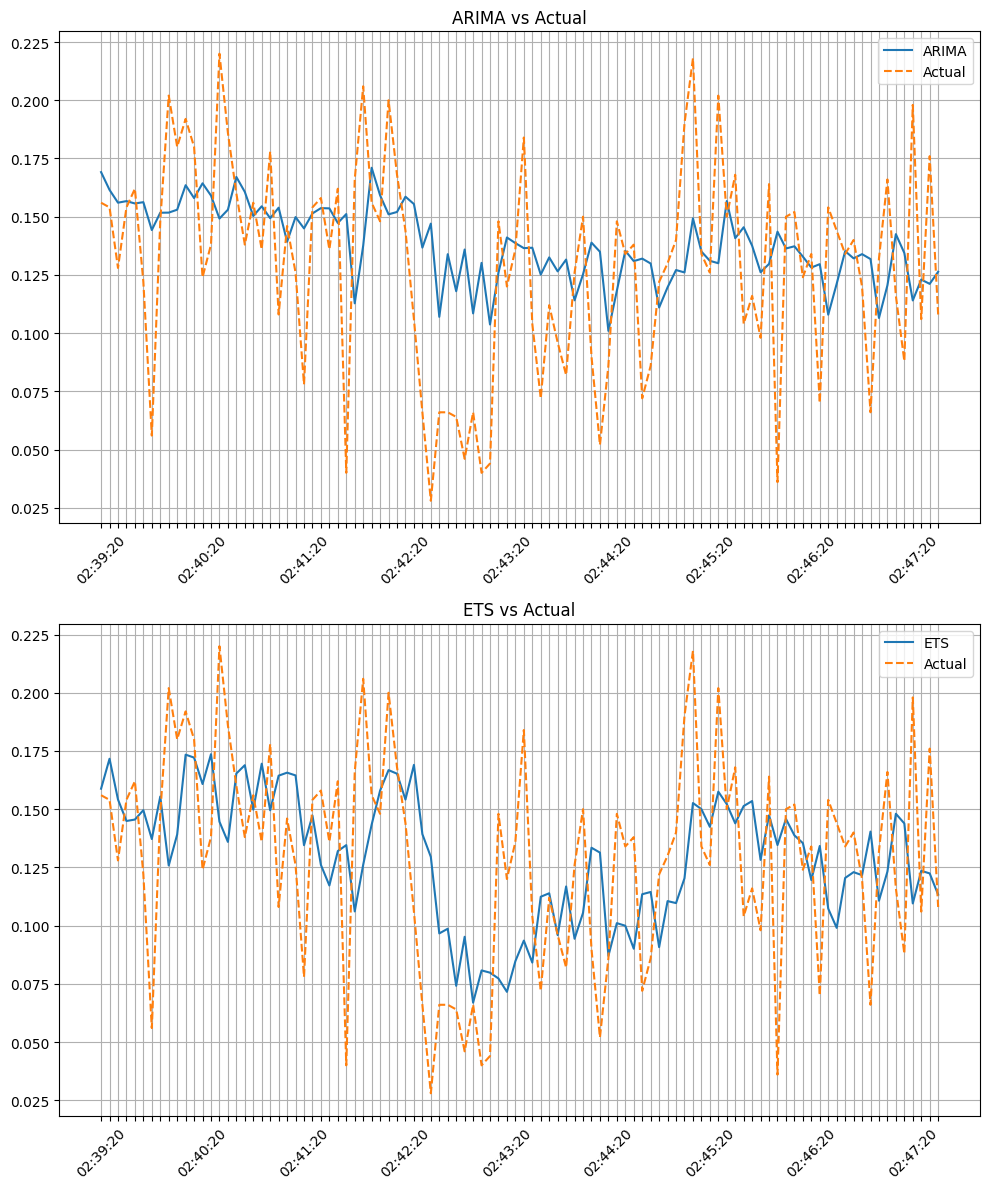

In [23]:
# Plot the data
fig, axes = plt.subplots(
    nrows=len(df.columns) - len(IGNORED_COLS), 
    figsize=(10, 6 * (len(df.columns) - len(IGNORED_COLS)))
    )

ax_idx = 0  # Separate index for accessing axes

for column in df.columns:
    if column not in IGNORED_COLS:
        axes[ax_idx].plot(df['FormattedTime'], df[column], label=column)
        axes[ax_idx].plot(df['FormattedTime'], df['Actual'], label='Actual', linestyle='--')
        
        # Sparse Tick Labels logic
        n = 12  # Display every n-th label 
        for index, label in enumerate(axes[ax_idx].xaxis.get_ticklabels()):
            if index % n != 0:
                label.set_visible(False)

        # Rotate the visible x-axis labels
        axes[ax_idx].tick_params(axis='x', rotation=45)

        axes[ax_idx].legend()
        axes[ax_idx].grid(True)
        axes[ax_idx].set_title(f'{column} vs Actual')
        ax_idx += 1  # Increment ax_idx

plt.tight_layout()
plt.show()